## Voos Mais Seguros: A Ciência de Dados Como Bússola da Prevenção Aeronáutica

Técnologias Utilizadas

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import locale
from wordcloud import WordCloud

## ETAPA 1 - ETL -> EXTRAÇÃO DOS DADOS VIA WEB

Download do dataset diretamente do site

In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("liamarguedas/brazil-total-aeronautical-occurrences-2010-2021")

print("Path to dataset files:", path)

c:\Users\gahco\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 991k/991k [00:00<00:00, 1.70MB/s]

Extracting files...
Path to dataset files: C:\Users\gahco\.cache\kagglehub\datasets\liamarguedas\brazil-total-aeronautical-occurrences-2010-2021\versions\1


## ABRINDO OS ARQUIVOS CSV

In [18]:
import os

caminho_1 = r'C:/Users/gahco/.cache/kagglehub/datasets/liamarguedas/brazil-total-aeronautical-occurrences-2010-2021/versions/1/Brazil Total Aeronautical Occurrences 2010 - 2021.csv'


df = pd.read_csv(caminho_1)

df.head(10)

,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,...,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,INCIDENTE GRAVE,-9.868333333333,-67.89805555555,RIO BRANCO,AC,BRASIL,SBRB,14/04/2022,17:45:00,SIM,...,SANTA ROSA DO PURUS,PLÁCIDO DE CASTRO,APROXIMAÇÃO FINAL,TÁXI AÉREO,NENHUM,0,SUPERVISÃO GERENCIAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
1,ACIDENTE,-12.20416666666,-56.23777777777,IPIRANGA DO NORTE,MT,BRASIL,Fora de aerodromo,24/03/2022,19:30:00,SIM,...,FORA DE AERODROMO,FORA DE AERODROMO,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0,ATENÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
2,ACIDENTE,-12.20416666666,-56.23777777777,IPIRANGA DO NORTE,MT,BRASIL,Fora de aerodromo,24/03/2022,19:30:00,SIM,...,FORA DE AERODROMO,FORA DE AERODROMO,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0,ATITUDE,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
3,ACIDENTE,-12.20416666666,-56.23777777777,IPIRANGA DO NORTE,MT,BRASIL,Fora de aerodromo,24/03/2022,19:30:00,SIM,...,FORA DE AERODROMO,FORA DE AERODROMO,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0,JULGAMENTO DE PILOTAGEM,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
4,ACIDENTE,-12.20416666666,-56.23777777777,IPIRANGA DO NORTE,MT,BRASIL,Fora de aerodromo,24/03/2022,19:30:00,SIM,...,FORA DE AERODROMO,FORA DE AERODROMO,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0,PERCEPÇÃO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
5,ACIDENTE,-12.20416666666,-56.23777777777,IPIRANGA DO NORTE,MT,BRASIL,Fora de aerodromo,24/03/2022,19:30:00,SIM,...,FORA DE AERODROMO,FORA DE AERODROMO,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0,PLANEJAMENTO DE VOO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
6,ACIDENTE,-12.20416666666,-56.23777777777,IPIRANGA DO NORTE,MT,BRASIL,Fora de aerodromo,24/03/2022,19:30:00,SIM,...,FORA DE AERODROMO,FORA DE AERODROMO,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0,POUCA EXPERIÊNCIA DO PILOTO,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
7,ACIDENTE,-12.20416666666,-56.23777777777,IPIRANGA DO NORTE,MT,BRASIL,Fora de aerodromo,24/03/2022,19:30:00,SIM,...,FORA DE AERODROMO,FORA DE AERODROMO,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0,PROCESSO DECISÓRIO,ASPECTO PSICOLÓGICO,INDIVIDUAL,FATOR HUMANO
8,ACIDENTE,-12.20416666666,-56.23777777777,IPIRANGA DO NORTE,MT,BRASIL,Fora de aerodromo,24/03/2022,19:30:00,SIM,...,FORA DE AERODROMO,FORA DE AERODROMO,MANOBRA,AGRÍCOLA,SUBSTANCIAL,0,SUPERVISÃO GERENCIAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL
9,ACIDENTE,-19.19833333333,-45.01166666666,POMPÉU,MG,BRASIL,SNPO,13/03/2022,15:00:00,SIM,...,TENENTE XAVIER,TENENTE XAVIER,DECOLAGEM,AGRÍCOLA,SUBSTANCIAL,0,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL


In [19]:
print("Total de linhas:\n", len(df))
print("\nNome das colunas:\n", df.columns.tolist())

Total de linhas:
 7567

Nome das colunas:
 ['ocorrencia_classificacao', 'ocorrencia_latitude', 'ocorrencia_longitude', 'ocorrencia_cidade', 'ocorrencia_uf', 'ocorrencia_pais', 'ocorrencia_aerodromo', 'ocorrencia_dia', 'ocorrencia_hora', 'investigacao_aeronave_liberada', 'investigacao_status', 'divulgacao_relatorio_numero', 'divulgacao_relatorio_publicado', 'divulgacao_dia_publicacao', 'total_recomendacoes', 'total_aeronaves_envolvidas', 'ocorrencia_saida_pista', 'ocorrencia_tipo', 'ocorrencia_tipo_categoria', 'taxonomia_tipo_icao', 'recomendacao_numero', 'recomendacao_dia_assinatura', 'recomendacao_dia_encaminhamento', 'recomendacao_dia_feedback', 'recomendacao_conteudo', 'recomendacao_status', 'recomendacao_destinatario_sigla', 'recomendacao_destinatario', 'aeronave_matricula', 'aeronave_tipo_veiculo', 'aeronave_fabricante', 'aeronave_modelo', 'aeronave_tipo_icao', 'aeronave_motor_tipo', 'aeronave_motor_quantidade', 'aeronave_pmd', 'aeronave_pmd_categoria', 'aeronave_assentos', 'aeron

## 📊 Analise temporal

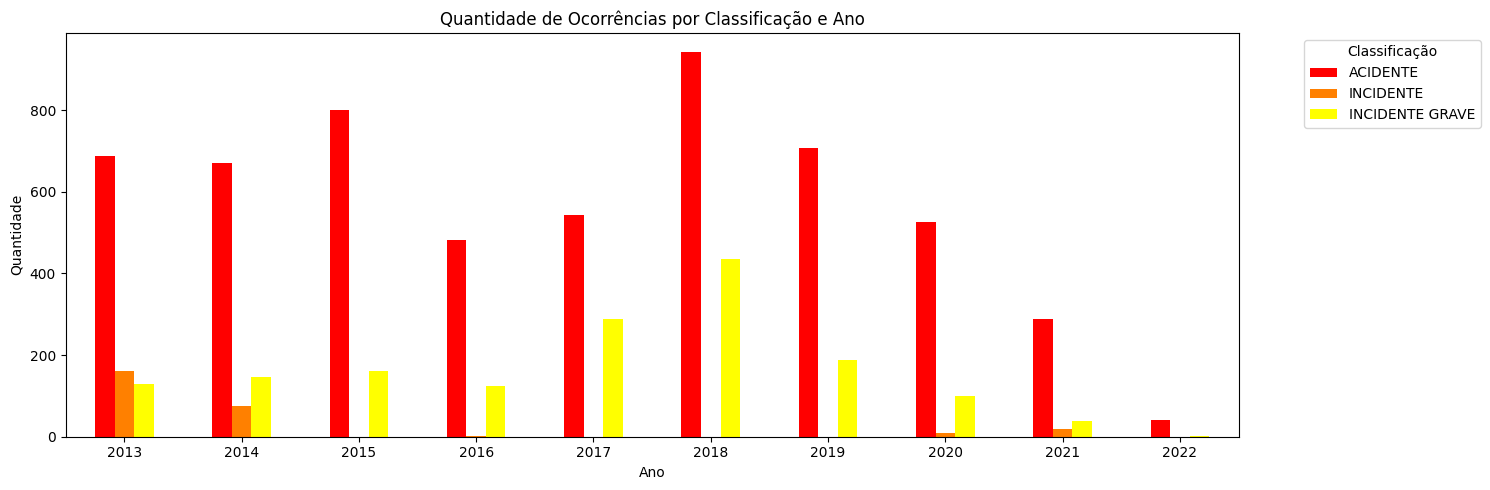

In [38]:
# Contagem total por classificação
counts = df['ocorrencia_classificacao'].value_counts()

df['ano'] = pd.to_datetime(df['ocorrencia_dia'], dayfirst=True).dt.year

# Gráfico 1: Ocorrências por classificação e ano
counts_ano = df.groupby(['ano', 'ocorrencia_classificacao']).size().unstack(fill_value=0)

counts_ano.plot(kind='bar', stacked=False, figsize=(15, 5),
                title='Quantidade de Ocorrências por Classificação e Ano',
                colormap='autumn')

plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.legend(title='Classificação', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


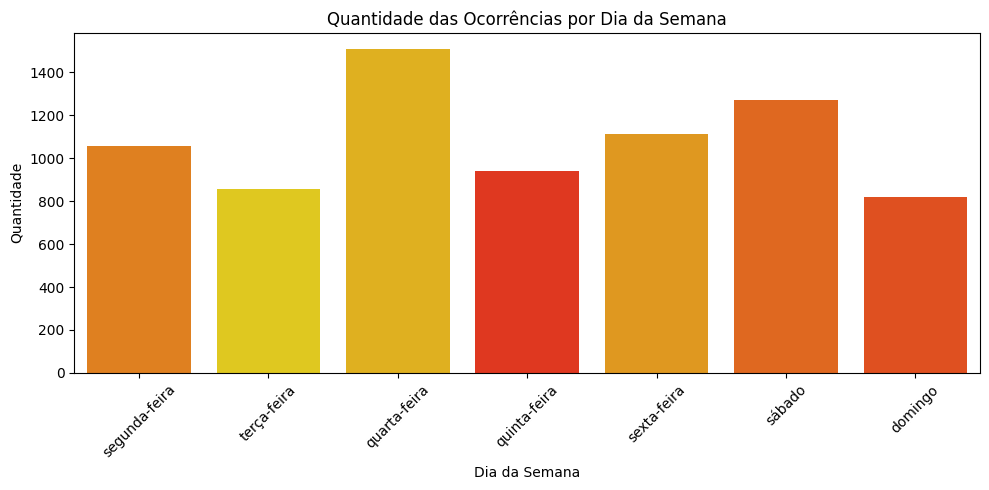

In [58]:
# Configurar o locale para português (ajuste conforme seu sistema operacional)
locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil.1252')

# Converter colunas de data e hora
df['ocorrencia_dia'] = pd.to_datetime(df['ocorrencia_dia'], format='%d/%m/%Y', errors='coerce')
df['ocorrencia_hora'] = pd.to_datetime(df['ocorrencia_hora'], format='%H:%M:%S', errors='coerce').dt.time

# Extrair o dia da semana (em português) e a hora formatada
df['dia_semana'] = df['ocorrencia_dia'].dt.strftime('%A')
df['hora'] = df['ocorrencia_hora'].apply(lambda x: x.strftime('%H:%M') if pd.notnull(x) else None)

ordem_semana = ['segunda-feira', 'terça-feira', 'quarta-feira', 'quinta-feira',
           'sexta-feira', 'sábado', 'domingo']
# Gráfico: Ocorrências por dia da semana
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='dia_semana', hue='dia_semana', order=ordem_semana, palette='autumn', legend=False)

plt.title('Quantidade das Ocorrências por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


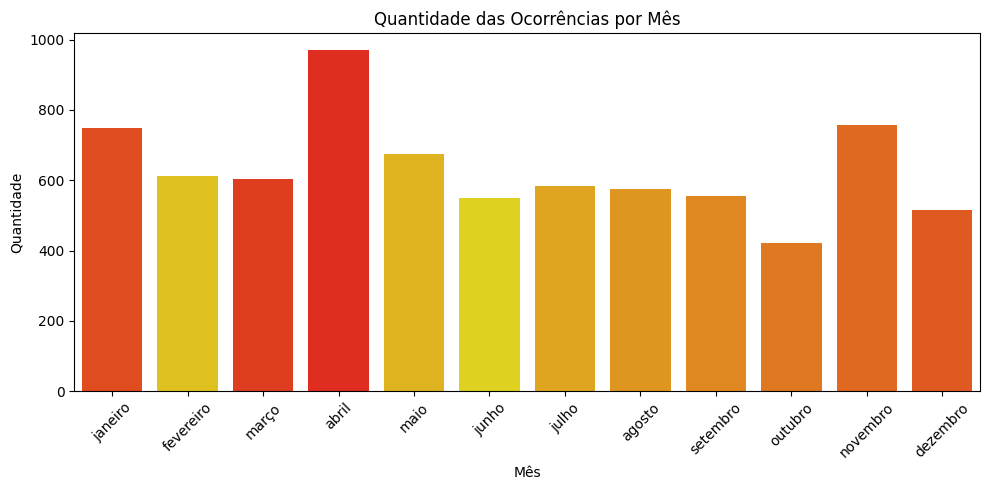

In [89]:
# Definindo o idioma para português (ajuste conforme seu sistema)
locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil.1252')

# Criando a coluna com o nome do mês em português
df['mes'] = df['ocorrencia_dia'].dt.strftime('%B')

# Ordem correta dos meses em português
ordem_meses = ['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho',
               'julho', 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro']

# Gráfico
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='mes', hue='mes', order=ordem_meses, palette='autumn')
plt.title('Quantidade das Ocorrências por Mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


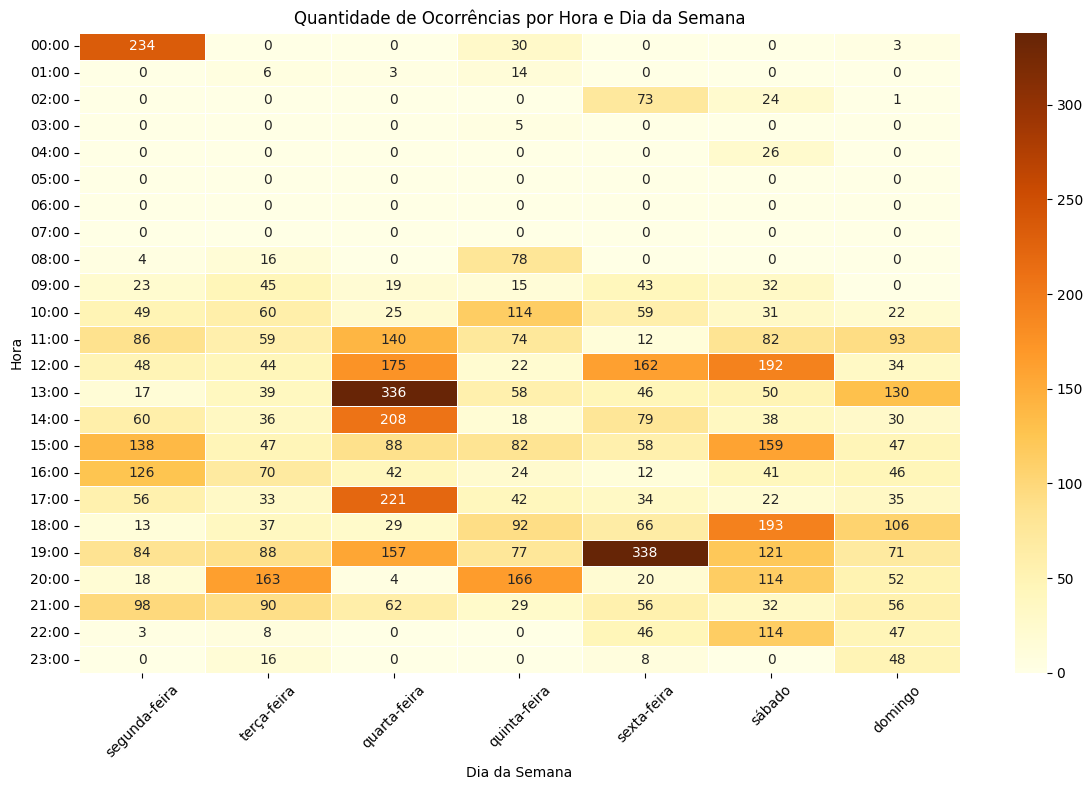

In [64]:
df['hora_cheia'] = df['ocorrencia_hora'].apply(lambda x: x.strftime('%H:00') if pd.notnull(x) else None)

tabela = df.pivot_table(index='hora_cheia', columns='dia_semana', aggfunc='size', fill_value=0)
tabela = tabela[ordem_dias]  # manter ordem dos dias da semana
tabela = tabela.reindex(ordem_horas, axis=0)  # manter ordem das horas
tabela = tabela.fillna(0)  # preencher NaN com 0
tabela = tabela.astype(int)  # converter para inteiro

# Gráfico de calor
plt.figure(figsize=(12, 8))
sns.heatmap(tabela, cmap='YlOrBr', annot=True, fmt='d', linewidths=.5)
plt.title('Quantidade de Ocorrências por Hora e Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Hora')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### 🌎 Análise Geográfica

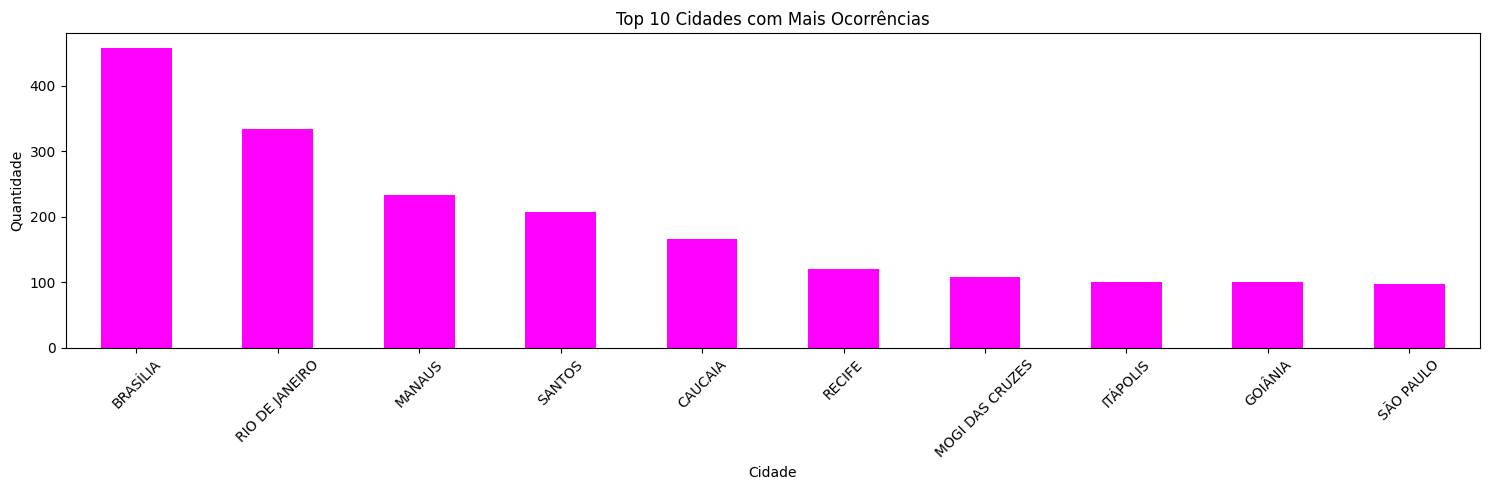

In [91]:
# Gráfico 1: TOP 10 cidade com mais Ocorrências
plt.figure(figsize=(15, 5))
df['ocorrencia_cidade'].value_counts().head(10).plot(kind='bar', color='magenta') 
plt.title('Top 10 Cidades com Mais Ocorrências')
plt.xlabel('Cidade')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

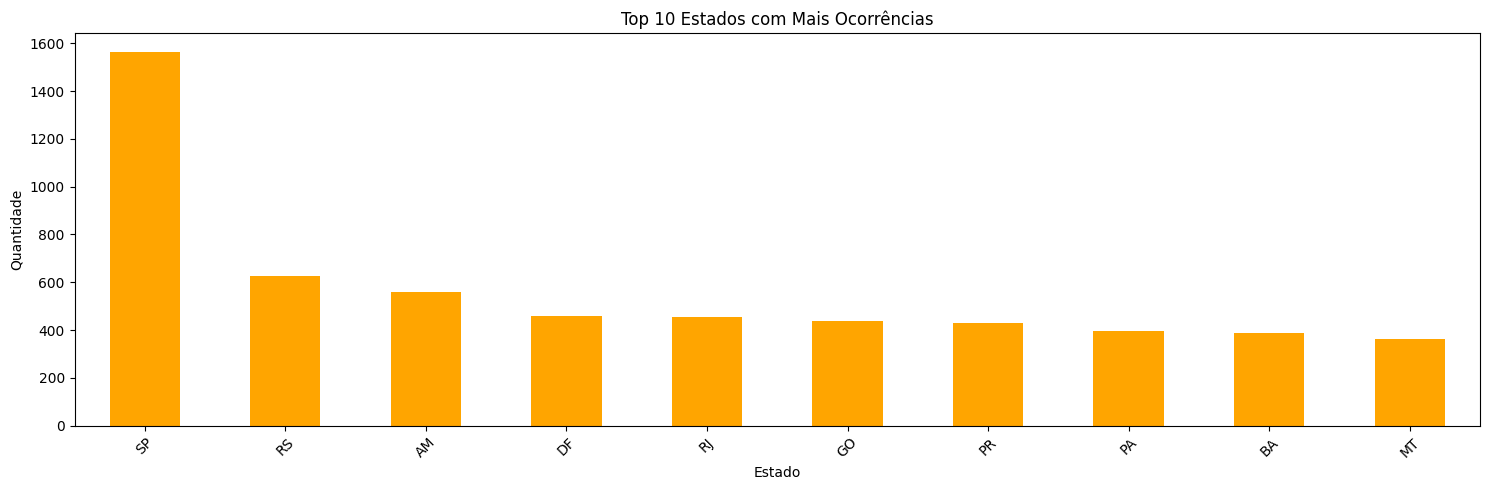

In [ ]:
# Gráfico 2: TOP10 estado com mais Ocorrências
plt.figure(figsize=(15, 5))
df['ocorrencia_uf'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Estados com Mais Ocorrências')
plt.xlabel('Estado')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

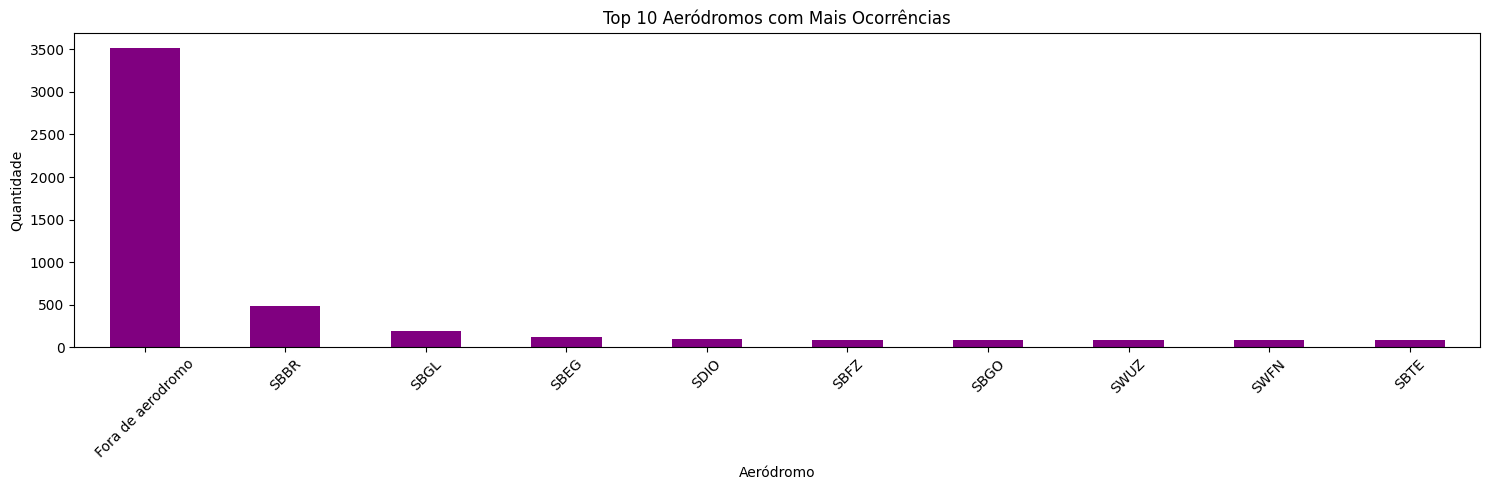

In [92]:
# Aeródromos mais recorrentes (ocorrencia_aerodromo)
plt.figure(figsize=(15, 5))
df['ocorrencia_aerodromo'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Aeródromos com Mais Ocorrências')
plt.xlabel('Aeródromo')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

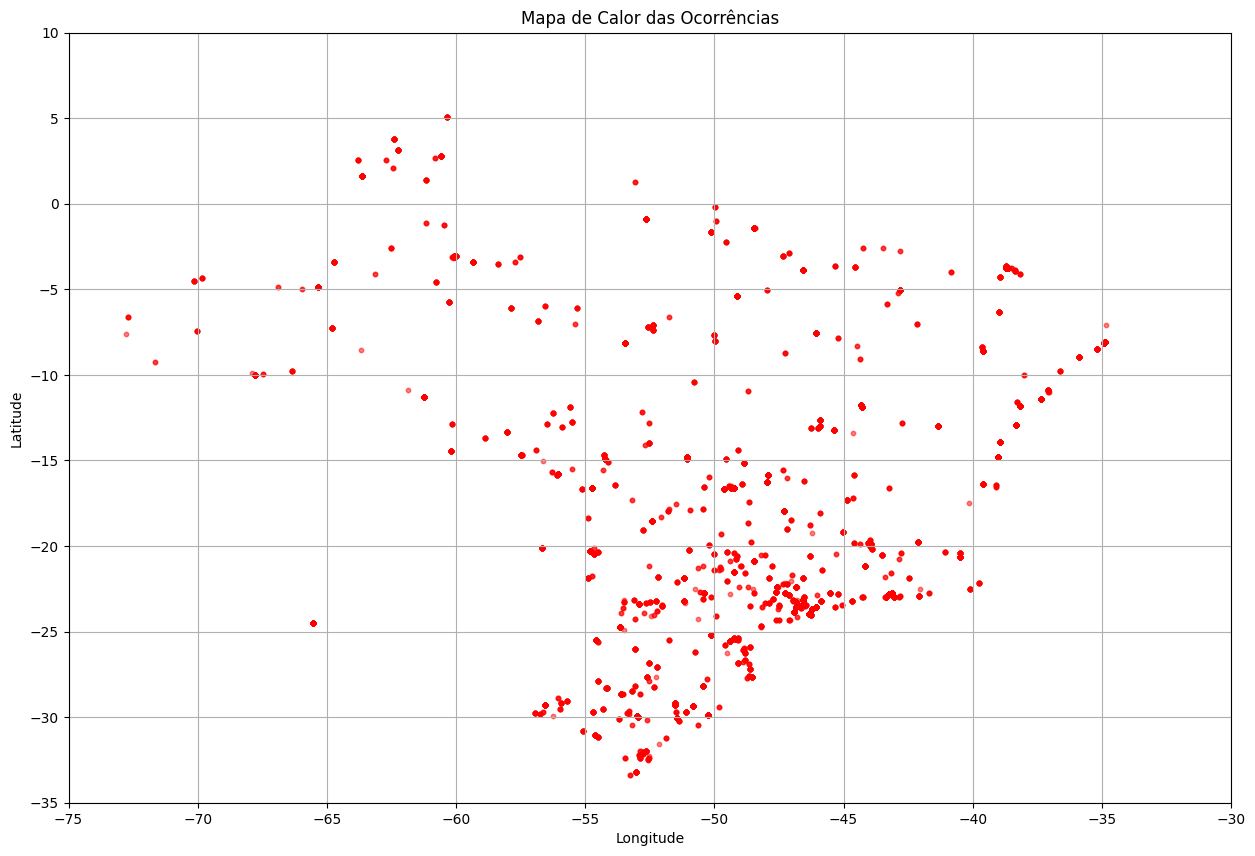

In [95]:
# Mapa de calor com latitude e longitude (ocorrencia_latitude, ocorrencia_longitude)

# Converter latitude e longitude para valores numéricos e tratar valores ausentes
df['ocorrencia_latitude'] = pd.to_numeric(df['ocorrencia_latitude'], errors='coerce')
df['ocorrencia_longitude'] = pd.to_numeric(df['ocorrencia_longitude'], errors='coerce')

# Remover linhas com valores ausentes em latitude ou longitude
df_cleaned = df.dropna(subset=['ocorrencia_latitude', 'ocorrencia_longitude'])

# Gráfico 1: Mapa de calor com latitude e longitude
plt.figure(figsize=(15, 10))
plt.scatter(df_cleaned['ocorrencia_longitude'], df_cleaned['ocorrencia_latitude'], alpha=0.5, c='red', s=10)
plt.title('Mapa de Calor das Ocorrências')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-75, -30)  # Ajuste os limites conforme necessário
plt.ylim(-35, 10)  # Ajuste os limites conforme necessário
plt.grid()
plt.show()